#Классификация изображений с помощью нейронных сетей

#1 часть -  Аугментация данных

In [ ]:
# Настройка трансформации изображений с помощью ImageDataGenerator (увеличение набора данных)
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
# Загрузим содержание гугл-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# скопируем датасеты с Google диска в Colab
!cp '/content/drive/MyDrive/Dolphin.zip'   Dolphin.zip
!cp '/content/drive/MyDrive/Seal.zip'   Seal.zip

In [ ]:
# Проверим, что выбранные файлы загрузились в Colaboratory при помощи команды ls
!ls

Dolphin.zip  drive  sample_data  Seal.zip


### Подготовка исходных изображений

In [ ]:
# распаковка архива
!unzip Dolphin.zip
!unzip Seal.zip

Archive:  Dolphin.zip
   creating: Dolphin/
  inflating: Dolphin/10004986625_0f786ab86b_b.jpg  
  inflating: Dolphin/10024981276_65f3d41599_b.jpg  
  inflating: Dolphin/10080987554_27d23b7ca3_o.jpg  
  inflating: Dolphin/10132691013_8d9e263177_o.jpg  
  inflating: Dolphin/10153182025_b69bef91f0_b.jpg  
  inflating: Dolphin/10162596245_7b2714189c_b.jpg  
  inflating: Dolphin/10224905906_94231b2cd6_b.jpg  
  inflating: Dolphin/10242419916_57b7581c4e_o.jpg  
  inflating: Dolphin/10322994536_8bfd6decf1_b.jpg  
  inflating: Dolphin/10325328745_bcc475b493_o.jpg  
  inflating: Dolphin/10329978914_923a9af626_o.png  
  inflating: Dolphin/10426410553_2b4c9167f0_b.jpg  
  inflating: Dolphin/10446046326_b23d79bcc8_o.jpg  
  inflating: Dolphin/10501809364_d8135e034f_o.jpg  
  inflating: Dolphin/10730556235_0ccecfff6c_o.jpg  
  inflating: Dolphin/10792745504_ce6c3cabc1_o.jpg  
  inflating: Dolphin/11069080083_f7fd94a22e_b.jpg  
  inflating: Dolphin/11128268906_8710733fd8_o.jpg  
  inflating: Dolphin

In [ ]:
# запишем список файлов  директорий в соответствующие переменные
import os
Dolphins = os.listdir('/content/Dolphin')
Seals = os.listdir('/content/Seal')

In [ ]:
print(Dolphins)
print(Seals)

['16313215708_bb4684c242_b.jpg', '7071153479_abd0239f50_o.jpg', '6105971823_6a3cf7d887_o.jpg', '10792745504_ce6c3cabc1_o.jpg', '29507398436_c9578f6fcd_b.jpg', '7106579883_f4b7194e1c_b.jpg', '9676499406_df69dbbe21_o.jpg', '6126038408_b5544b5a62_o.jpg', '5630771444_124aac6726_b.jpg', '9701864821_bff12e1092_o.jpg', '6079914833_82695913ea_o.jpg', '5645562426_a68700931f_o.jpg', '7147058235_838f393ff0_b.jpg', '7350208904_0092953da1_o.jpg', '16121318114_cf2d6a6fc3_b.jpg', '6904632483_9c9d4cc861_o.jpg', '6012065568_525a99832f_o.jpg', '11991977473_c6500e25e7_o.jpg', '15960657048_5f8f0e0606_o.jpg', '5419680025_b8ecd0b19e_o.jpg', '25839838402_8232cc6507_b.jpg', '4419748520_7507cc43d7_b.jpg', '3370883017_3917e091aa_o.jpg', '5988095604_f3ff54c8e7_o.jpg', '14085834241_a11ef09a10_b.jpg', '9792651134_fd81ea9f4b_o.jpg', '4974048218_6d7657d526_o.jpg', '29367186781_bc1a0bf1f6_b.jpg', '7090621259_878f312975_b.jpg', '4483578369_c5d69c1143_b.jpg', '8707969448_8271a97651_b.jpg', '5988982678_ceeb5f6557_o.jpg'

In [ ]:
# Создадим директорию "Data", в которую будем сохранять аугментированные данные
!mkdir Data

In [ ]:
!ls

Data  Dolphin  Dolphin.zip  drive  sample_data	Seal  Seal.zip


### Генерация новых изображений

In [ ]:
from tensorflow.keras.utils import img_to_array
# функция для генерации изображений
def generating_pictures(img, prefix):
  x = img_to_array(img)  # это массив Numpy с формой (канал цвета, высота, ширина)
  x = x.reshape((1,) + x.shape)  # изменение формы массива (количество изображений, канал цвета, высота, ширина)
  i = 0 # счетчик изображений
  for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/Data/', save_prefix = prefix, save_format='jpeg'):
      i += 1
      if i > 20:
          break  # выход из цикла при i > 20

In [ ]:
# Создадим путь к файлам датасета "Dolphin":

path_Dolphins = []
for name in Dolphins:
  path='/content/Dolphin/' + name
  path_Dolphins.append(path)

In [ ]:
# Создадим путь к файлам датасета "Seal":

path_Seals = []
for name in Seals:
  path='/content/Seal/' + name
  path_Seals.append(path)

In [ ]:
path_Dolphins

['/content/Dolphin/16313215708_bb4684c242_b.jpg',
 '/content/Dolphin/7071153479_abd0239f50_o.jpg',
 '/content/Dolphin/6105971823_6a3cf7d887_o.jpg',
 '/content/Dolphin/10792745504_ce6c3cabc1_o.jpg',
 '/content/Dolphin/29507398436_c9578f6fcd_b.jpg',
 '/content/Dolphin/7106579883_f4b7194e1c_b.jpg',
 '/content/Dolphin/9676499406_df69dbbe21_o.jpg',
 '/content/Dolphin/6126038408_b5544b5a62_o.jpg',
 '/content/Dolphin/5630771444_124aac6726_b.jpg',
 '/content/Dolphin/9701864821_bff12e1092_o.jpg',
 '/content/Dolphin/6079914833_82695913ea_o.jpg',
 '/content/Dolphin/5645562426_a68700931f_o.jpg',
 '/content/Dolphin/7147058235_838f393ff0_b.jpg',
 '/content/Dolphin/7350208904_0092953da1_o.jpg',
 '/content/Dolphin/16121318114_cf2d6a6fc3_b.jpg',
 '/content/Dolphin/6904632483_9c9d4cc861_o.jpg',
 '/content/Dolphin/6012065568_525a99832f_o.jpg',
 '/content/Dolphin/11991977473_c6500e25e7_o.jpg',
 '/content/Dolphin/15960657048_5f8f0e0606_o.jpg',
 '/content/Dolphin/5419680025_b8ecd0b19e_o.jpg',
 '/content/Dol

In [ ]:
path_Seals

['/content/Seal/27289193452_78986153e7_b.jpg',
 '/content/Seal/34662970056_552369758f_o.jpg',
 '/content/Seal/35045812902_b6b2f8a3b7_b.jpg',
 '/content/Seal/31975434447_6f80a55576_o.jpg',
 '/content/Seal/6806742714_84dba88a7e_o.jpg',
 '/content/Seal/6324733141_97dfac9cac_b.jpg',
 '/content/Seal/41246122730_52a7f0704f_o.jpg',
 '/content/Seal/5511972976_2449277b49_o.jpg',
 '/content/Seal/7922337750_5ea181e720_b.jpg',
 '/content/Seal/6176481069_9dd590c166_o.jpg',
 '/content/Seal/27016384913_7f5a6b2363_b.jpg',
 '/content/Seal/43019100824_22015bef75_o.jpg',
 '/content/Seal/14604392974_d14cc2baa2_b.jpg',
 '/content/Seal/5493034348_66fe1abe5d_b.jpg',
 '/content/Seal/6485626257_b33ca7bcc6_b.jpg',
 '/content/Seal/27585503480_88ea7977e6_b.jpg',
 '/content/Seal/7691779096_f1e4a5ac32_b.jpg',
 '/content/Seal/29853243895_d5f6ac86ed_o.jpg',
 '/content/Seal/6471035061_dbe8cd32a4_o.jpg',
 '/content/Seal/16030203438_1115229653_o.jpg',
 '/content/Seal/14787913788_e3476283e8_b.jpg',
 '/content/Seal/319849

In [ ]:
# создание префикса для новых файлов
prefix_Dolphins = 'Dolphins'
prefix_Seals = 'Seals'

In [ ]:
# создание словаря с аргументами для функции generating_pictures
dict_Dolphins = dict.fromkeys(path_Dolphins, prefix_Dolphins)
dict_Seals = dict.fromkeys(path_Seals, prefix_Seals)

In [ ]:
from tensorflow.keras.utils import load_img
# определение аргументов для файлов Dolphins
for key, value in dict_Dolphins.items():
  img = load_img(key)  # путь к имени файла
  prefix = value # префикс для нового файла
  # вызов функции
  generating_pictures(img, prefix)

In [ ]:
# определение аргументов для файлов Seals
for key, value in dict_Seals.items():
  img = load_img(key)  # путь к имени файла
  prefix = value # префикс для нового файла
  # вызов функции
  generating_pictures(img, prefix)

In [ ]:
# Посмотрим на список файлов в директории Data

print(os.listdir('/content/Data'))

['Seals_0_2281.jpeg', 'Seals_0_3481.jpeg', 'Dolphins_0_4467.jpeg', 'Seals_0_6456.jpeg', 'Seals_0_17.jpeg', 'Seals_0_9736.jpeg', 'Seals_0_7281.jpeg', 'Seals_0_4816.jpeg', 'Dolphins_0_6929.jpeg', 'Seals_0_7029.jpeg', 'Dolphins_0_8666.jpeg', 'Seals_0_9213.jpeg', 'Dolphins_0_5566.jpeg', 'Dolphins_0_8391.jpeg', 'Dolphins_0_1209.jpeg', 'Seals_0_217.jpeg', 'Seals_0_4942.jpeg', 'Seals_0_3017.jpeg', 'Seals_0_2949.jpeg', 'Dolphins_0_5995.jpeg', 'Dolphins_0_581.jpeg', 'Seals_0_5581.jpeg', 'Dolphins_0_3759.jpeg', 'Dolphins_0_9342.jpeg', 'Seals_0_2973.jpeg', 'Seals_0_1521.jpeg', 'Seals_0_2758.jpeg', 'Dolphins_0_5179.jpeg', 'Dolphins_0_7083.jpeg', 'Seals_0_5659.jpeg', 'Seals_0_7547.jpeg', 'Seals_0_2140.jpeg', 'Seals_0_166.jpeg', 'Dolphins_0_6927.jpeg', 'Seals_0_2074.jpeg', 'Seals_0_5285.jpeg', 'Seals_0_7562.jpeg', 'Dolphins_0_6059.jpeg', 'Dolphins_0_7779.jpeg', 'Seals_0_7302.jpeg', 'Seals_0_6513.jpeg', 'Seals_0_1999.jpeg', 'Seals_0_2083.jpeg', 'Seals_0_1414.jpeg', 'Seals_0_8116.jpeg', 'Dolphins_0_44

In [ ]:
# подсчет файлов в директории
!find /content/Data -type f| wc -l

12250


### Просмотр новых изображений

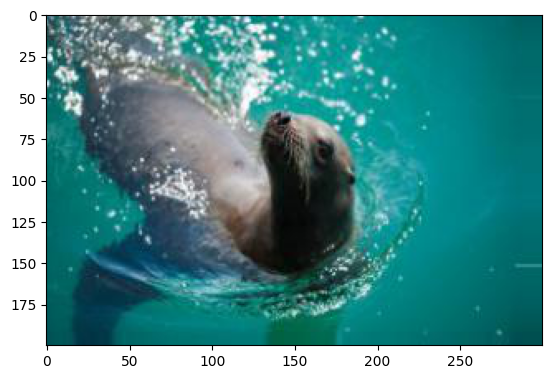

In [ ]:
# загрузим необходимые ресурсы
import matplotlib.pyplot as plt
import random
# поместим список новых файлов в переменную filenames
filenames = os.listdir('/content/Data')
# выберем случайный файл
sample = random.choice(filenames)
image = load_img("/content/Data/" + sample)
# посмотрим на изображение
plt.imshow(image)

### Упаковка архива с новыми данными

In [ ]:
# создание архива zip (сжатие от 1 до 9)
!zip -r -9 Sea_creatures /content/Data/*

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: content/Data/Seals_0_2248.jpeg (deflated 4%)
  adding: content/Data/Seals_0_2251.jpeg (deflated 1%)
  adding: content/Data/Seals_0_2254.jpeg (deflated 2%)
  adding: content/Data/Seals_0_2255.jpeg (deflated 1%)
  adding: content/Data/Seals_0_2256.jpeg (deflated 4%)
  adding: content/Data/Seals_0_2257.jpeg (deflated 2%)
  adding: content/Data/Seals_0_225.jpeg (deflated 2%)
  adding: content/Data/Seals_0_2260.jpeg (deflated 2%)
  adding: content/Data/Seals_0_2263.jpeg (deflated 2%)
  adding: content/Data/Seals_0_2264.jpeg (deflated 1%)
  adding: content/Data/Seals_0_2266.jpeg (deflated 3%)
  adding: content/Data/Seals_0_2268.jpeg (deflated 3%)
  adding: content/Data/Seals_0_2269.jpeg (deflated 2%)
  adding: content/Data/Seals_0_226.jpeg (deflated 2%)
  adding: content/Data/Seals_0_2271.jpeg (deflated 3%)
  adding: content/Data/Seals_0_2273.jpeg (deflated 2%)
  adding: content/Data/Seals_0_2275.jpeg (deflated 1%)

In [ ]:
!ls

Data	 Dolphin.zip  sample_data	 Seal
Dolphin  drive	      Sea_creatures.zip  Seal.zip


In [ ]:
# копируем архив Sea_creatures.zip на  Google-диск
!cp '/content/Sea_creatures.zip' '/content/drive/My Drive'

#2 Часть. Классификация изображений

In [ ]:
# копирование архива Sea_creatures.zip с данными в Colaboratory с Google-диска
!cp '/content/drive/My Drive/Sea_creatures.zip' Sea_creatures.zip

In [ ]:
# проверим наличие файла
!ls

Data	 Dolphin.zip  sample_data	 Seal
Dolphin  drive	      Sea_creatures.zip  Seal.zip


In [ ]:
# распакуем архив
!unzip Sea_creatures.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: content/Data/Seals_0_2248.jpeg  
  inflating: content/Data/Seals_0_2251.jpeg  
  inflating: content/Data/Seals_0_2254.jpeg  
  inflating: content/Data/Seals_0_2255.jpeg  
  inflating: content/Data/Seals_0_2256.jpeg  
  inflating: content/Data/Seals_0_2257.jpeg  
  inflating: content/Data/Seals_0_225.jpeg  
  inflating: content/Data/Seals_0_2260.jpeg  
  inflating: content/Data/Seals_0_2263.jpeg  
  inflating: content/Data/Seals_0_2264.jpeg  
  inflating: content/Data/Seals_0_2266.jpeg  
  inflating: content/Data/Seals_0_2268.jpeg  
  inflating: content/Data/Seals_0_2269.jpeg  
  inflating: content/Data/Seals_0_226.jpeg  
  inflating: content/Data/Seals_0_2271.jpeg  
  inflating: content/Data/Seals_0_2273.jpeg  
  inflating: content/Data/Seals_0_2275.jpeg  
  inflating: content/Data/Seals_0_2276.jpeg  
  inflating: content/Data/Seals_0_2277.jpeg  
  inflating: content/Data/Seals_0_2278.jpeg  
  inflating: c

In [ ]:
# импортируем модуль os для работы с файловой системой
import os
# создадим список файлов распакованной директории Data
filenames = os.listdir('/content/content/Data')

In [ ]:
# посмотрим на список файлов
filenames

['Seals_0_2281.jpeg',
 'Seals_0_3481.jpeg',
 'Dolphins_0_4467.jpeg',
 'Seals_0_6456.jpeg',
 'Seals_0_17.jpeg',
 'Seals_0_9736.jpeg',
 'Seals_0_7281.jpeg',
 'Seals_0_4816.jpeg',
 'Dolphins_0_6929.jpeg',
 'Seals_0_7029.jpeg',
 'Dolphins_0_8666.jpeg',
 'Seals_0_9213.jpeg',
 'Dolphins_0_5566.jpeg',
 'Dolphins_0_8391.jpeg',
 'Dolphins_0_1209.jpeg',
 'Seals_0_217.jpeg',
 'Seals_0_4942.jpeg',
 'Seals_0_3017.jpeg',
 'Seals_0_2949.jpeg',
 'Dolphins_0_5995.jpeg',
 'Dolphins_0_581.jpeg',
 'Seals_0_5581.jpeg',
 'Dolphins_0_3759.jpeg',
 'Dolphins_0_9342.jpeg',
 'Seals_0_2973.jpeg',
 'Seals_0_1521.jpeg',
 'Seals_0_2758.jpeg',
 'Dolphins_0_5179.jpeg',
 'Dolphins_0_7083.jpeg',
 'Seals_0_5659.jpeg',
 'Seals_0_7547.jpeg',
 'Seals_0_2140.jpeg',
 'Seals_0_166.jpeg',
 'Dolphins_0_6927.jpeg',
 'Seals_0_2074.jpeg',
 'Seals_0_5285.jpeg',
 'Seals_0_7562.jpeg',
 'Dolphins_0_6059.jpeg',
 'Dolphins_0_7779.jpeg',
 'Seals_0_7302.jpeg',
 'Seals_0_6513.jpeg',
 'Seals_0_1999.jpeg',
 'Seals_0_2083.jpeg',
 'Seals_0_1414

### Подготовка данных для нейронной сети

## Разметка

In [ ]:
import pandas as pd
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if 'Dolphins' in category:
        categories.append(0)
    else:
        categories.append(1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
# head() по умолчанию возвращает первые 5 записей
df.head()

,filename,category
0,Seals_0_2281.jpeg,1
1,Seals_0_3481.jpeg,1
2,Dolphins_0_4467.jpeg,0
3,Seals_0_6456.jpeg,1
4,Seals_0_17.jpeg,1


In [ ]:
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  12250 non-null  object
 1   category  12250 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 191.5+ KB


In [ ]:
# сумма значений в столбце 'category' по строкам (axis=0)
df['category'].sum(axis=0)

5808

<Axes: >

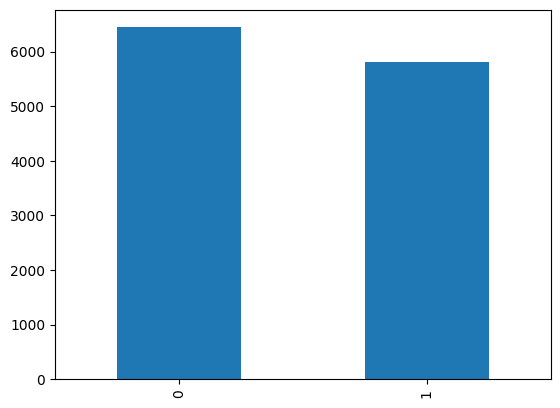

In [ ]:
# Для визуализации меток построим столбчатую диаграмму при помощи методов value_counts() и plot.bar().
import matplotlib.pyplot as plt
df['category'].value_counts().plot.bar()

### Определение параметров входных изображений

In [ ]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### Построение модели нейронной сети

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras import Sequential

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 classes

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

### Подготовка обучающей и проверочной выборок

In [ ]:
df['category'] = df['category'].replace({0: 'Dolphins', 1: 'Seals'})

In [ ]:
from sklearn.model_selection import train_test_split
# Создание обучающей и проверочной выборок
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=21)
train_df = train_df.reset_index(drop=True)
test_df = train_df[2450:].reset_index(drop=True)
train_df = train_df[:2450]
validate_df = validate_df.reset_index(drop=True)

In [ ]:
train_df.shape

(2450, 2)

In [ ]:
test_df.shape

(7350, 2)

In [ ]:
validate_df.shape

(2450, 2)

<Axes: >

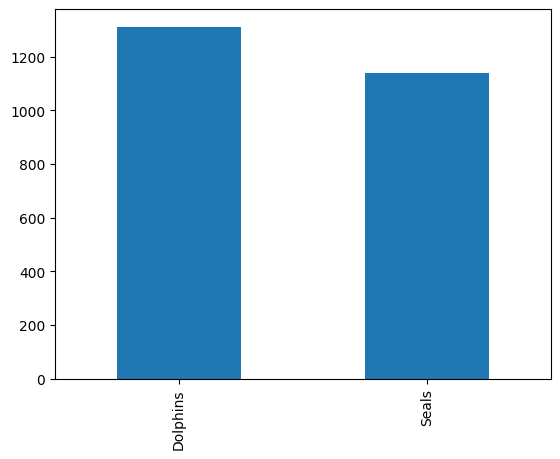

In [ ]:
train_df['category'].value_counts().plot.bar()

<Axes: >

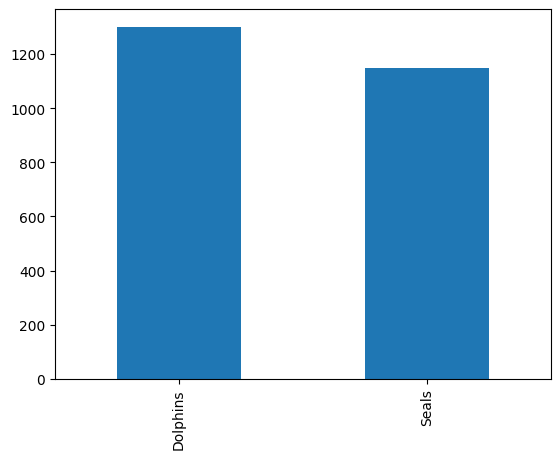

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
# обучающие и проверочные данные
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
# batch_size
batch_size=15

In [ ]:
print("Количество данных для обучения:", total_train)
print("Количество данных для оценки точности модели нейронной сети во время обучения:", total_validate)

Количество данных для обучения: 2450
Количество данных для оценки точности модели нейронной сети во время обучения: 2450


### Callbacks

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
earlystop = EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=2,
                                            factor=0.5,
                                            min_lr=0.00001)
modelCheckpoint = ModelCheckpoint("model-cnn.h5",
                                  monitor='val_accuracy',
                                  verbose=2,
                                  save_best_only=True)


In [ ]:
callbacks = [earlystop, learning_rate_reduction, modelCheckpoint]

### ImageDataGenerator для обучающих и проверочных данных

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.01,
    zoom_range=0.02,
    horizontal_flip=True,
    width_shift_range=0.01,
    height_shift_range=0.01
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2450 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.01,
    zoom_range=0.02,
    horizontal_flip=True,
    width_shift_range=0.01,
    height_shift_range=0.01
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2450 validated image filenames belonging to 2 classes.


In [ ]:
# Посмотрим как работает ImageDataGenerator на обучающей выборке. Выберем для этого три изображения и визуализируем их с помощью инструментов библиотеки matplotlib.
example_df = train_df.sample(n=3).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/content/Data/", # или "/content/Data/"
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 3 validated image filenames belonging to 2 classes.


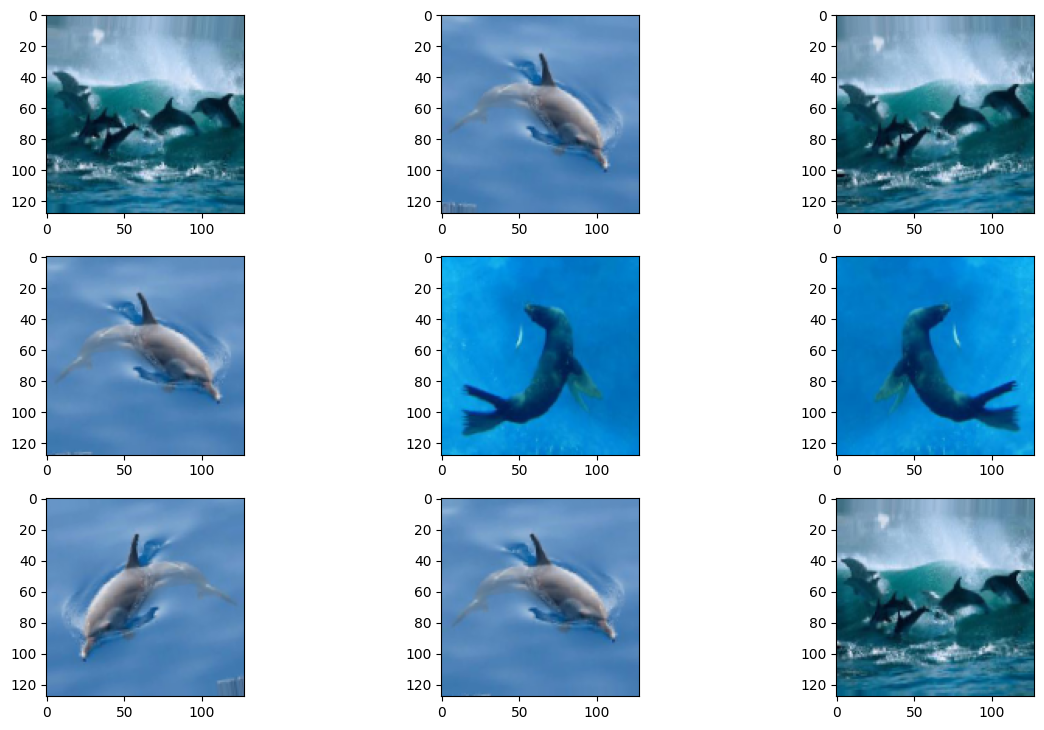

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### Обучение модели

In [ ]:
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks)

Epoch 1/50
163/163 [==============================] - ETA: 0s - loss: 0.8540 - accuracy: 0.7088
Epoch 00001: val_accuracy improved from -inf to 0.53170, saving model to model-cnn.h5
163/163 [==============================] - 204s 1s/step - loss: 0.8540 - accuracy: 0.7088 - val_loss: 0.9631 - val_accuracy: 0.5317 - lr: 0.0010
Epoch 2/50
163/163 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.7634
Epoch 00002: val_accuracy improved from 0.53170 to 0.65685, saving model to model-cnn.h5
163/163 [==============================] - 199s 1s/step - loss: 0.5782 - accuracy: 0.7634 - val_loss: 0.6319 - val_accuracy: 0.6569 - lr: 0.0010
Epoch 3/50
163/163 [==============================] - ETA: 0s - loss: 0.4986 - accuracy: 0.7844
Epoch 00003: val_accuracy improved from 0.65685 to 0.81309, saving model to model-cnn.h5
163/163 [==============================] - 210s 1s/step - loss: 0.4986 - accuracy: 0.7844 - val_loss: 0.4234 - val_accuracy: 0.8131 - lr: 0.0010
Epoch 4/50
16

In [ ]:
model.load_weights("model-cnn.h5")

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
history.history['accuracy']

[0.7088295817375183,
 0.7634496688842773,
 0.7843942642211914,
 0.8335378170013428,
 0.8521560430526733,
 0.8554414510726929,
 0.866940438747406,
 0.8817248344421387,
 0.9043121337890625,
 0.9117043018341064,
 0.9240246415138245,
 0.931006133556366,
 0.9412730932235718,
 0.9400410652160645,
 0.9511293768882751,
 0.943326473236084,
 0.9568788409233093,
 0.9474332928657532,
 0.9589322209358215,
 0.9568788409233093,
 0.9564681649208069,
 0.9498973488807678,
 0.9552361369132996,
 0.96796715259552,
 0.9675564765930176,
 0.9605749249458313,
 0.9749486446380615,
 0.9761806726455688,
 0.9667351245880127,
 0.9671458005905151,
 0.975359320640564,
 0.9700205326080322,
 0.9700205326080322,
 0.9831622242927551,
 0.9765913486480713,
 0.9749486446380615,
 0.9794661402702332,
 0.9819301962852478,
 0.9786447882652283,
 0.9778234362602234,
 0.9724845886230469]

In [ ]:
max(history.history['accuracy'])

0.9831622242927551

In [ ]:
history.history['val_accuracy']

[0.5316973328590393,
 0.6568506956100464,
 0.8130879402160645,
 0.7047034502029419,
 0.8216769099235535,
 0.8801636099815369,
 0.8654396533966064,
 0.878118634223938,
 0.9055214524269104,
 0.9357873201370239,
 0.9198364019393921,
 0.9316973686218262,
 0.9329243302345276,
 0.9382413029670715,
 0.9398772716522217,
 0.9374232888221741,
 0.9509202241897583,
 0.9456032514572144,
 0.9517382383346558,
 0.947648286819458,
 0.9554192423820496,
 0.9341513514518738,
 0.9546012282371521,
 0.9574642181396484,
 0.9595091938972473,
 0.9582822322845459,
 0.9660531878471375,
 0.9685071706771851,
 0.9648261666297913,
 0.9586911797523499,
 0.9631901979446411,
 0.9672801494598389,
 0.9631901979446411,
 0.9701431393623352,
 0.9648261666297913,
 0.9680981636047363,
 0.9672801494598389,
 0.9676891565322876,
 0.9648261666297913,
 0.9631901979446411,
 0.96523517370224]

In [ ]:
max(history.history['val_accuracy'])

0.9701431393623352

### Визуализация обучения

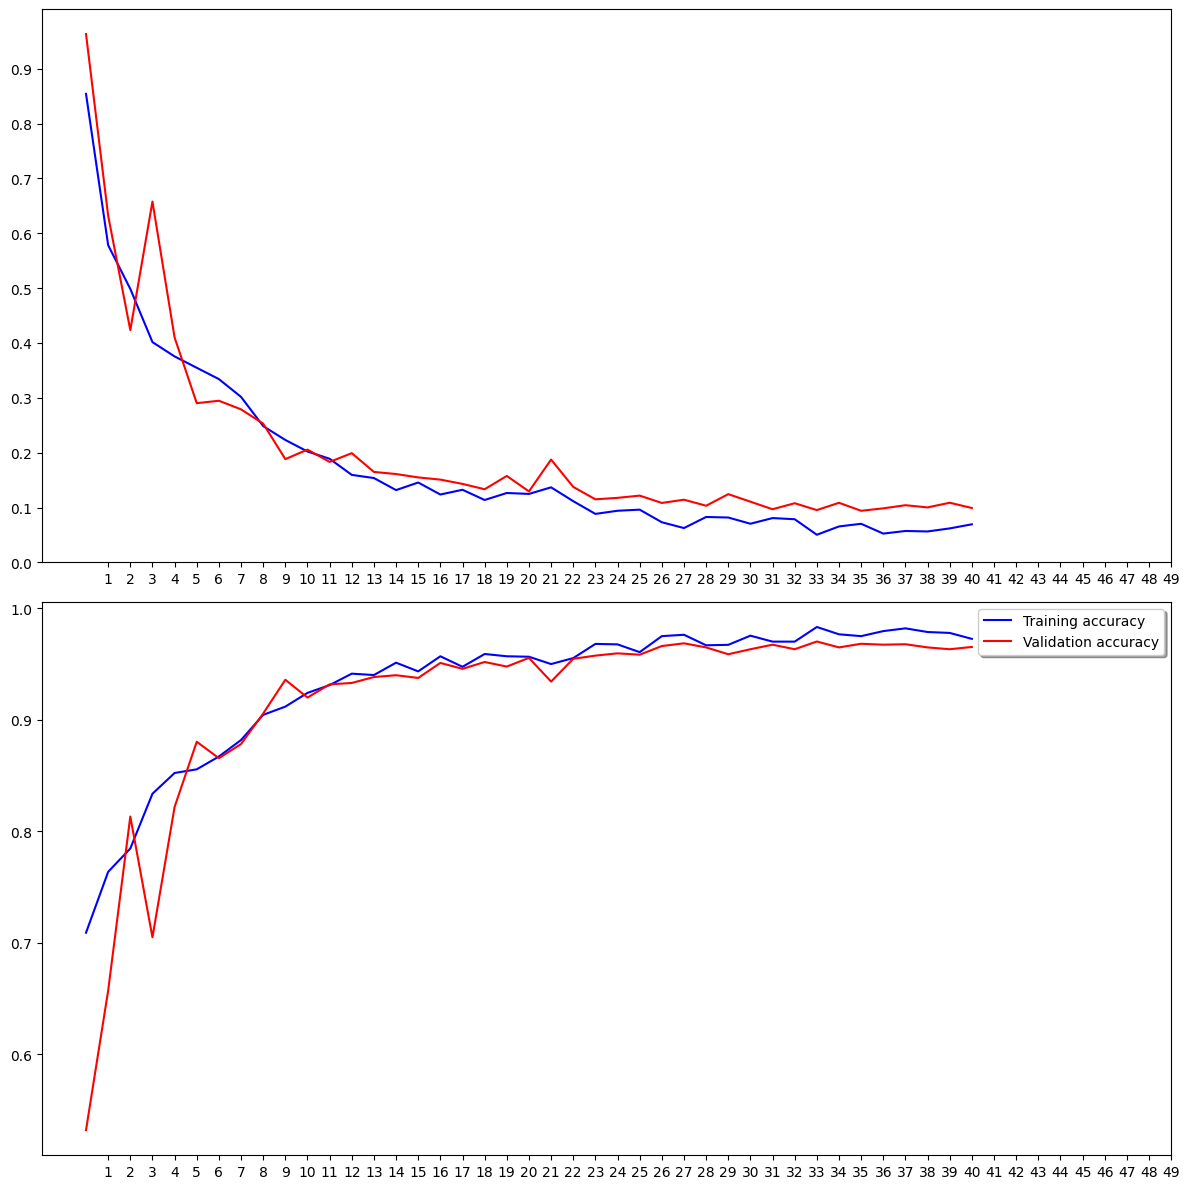

In [ ]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Подготовка тестовых данных

In [ ]:
!ls

content  Dolphin      drive	    sample_data        Seal
Data	 Dolphin.zip  model-cnn.h5  Sea_creatures.zip  Seal.zip


In [ ]:
# Количество тестовых файлов
nb_samples = test_df.shape[0]
nb_samples

7350

In [ ]:
test_df.head()

,filename,category
0,Dolphins_0_1221.jpeg,Dolphins
1,Seals_0_1375.jpeg,Seals
2,Seals_0_4227.jpeg,Seals
3,Seals_0_8044.jpeg,Seals
4,Seals_0_82.jpeg,Seals


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/Data/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=10,
    shuffle=False
)

Found 7350 validated image filenames.


In [ ]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/5))

 735/1470 [==============>...............] - ETA: 1:42

1470/1470 [==============================] - 103s 70ms/step


In [ ]:
predict.shape

(7350, 2)

In [ ]:
predict

array([[9.5750040e-01, 4.2499639e-02],
       [6.8155791e-06, 9.9999315e-01],
       [1.6893863e-04, 9.9983120e-01],
       ...,
       [2.5080490e-05, 9.9997491e-01],
       [9.9373078e-01, 6.2692165e-03],
       [9.9845576e-01, 1.5442130e-03]], dtype=float32)

In [ ]:
test_df['category'] = np.argmax(predict, axis=1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 0: 'Dolphins', 1: 'Seals'})

### Визулизация предсказанных классов изображений

<Axes: >

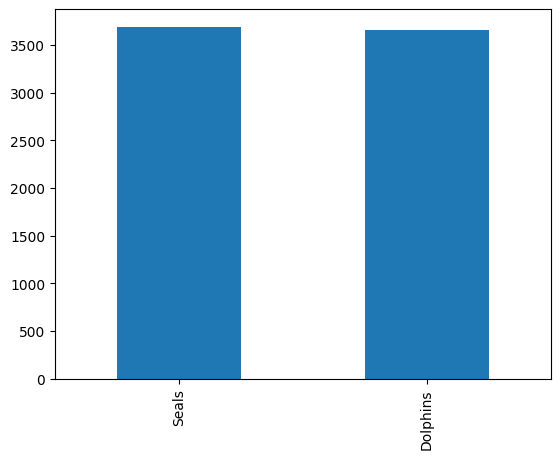

In [ ]:
test_df['category'].value_counts().plot.bar()

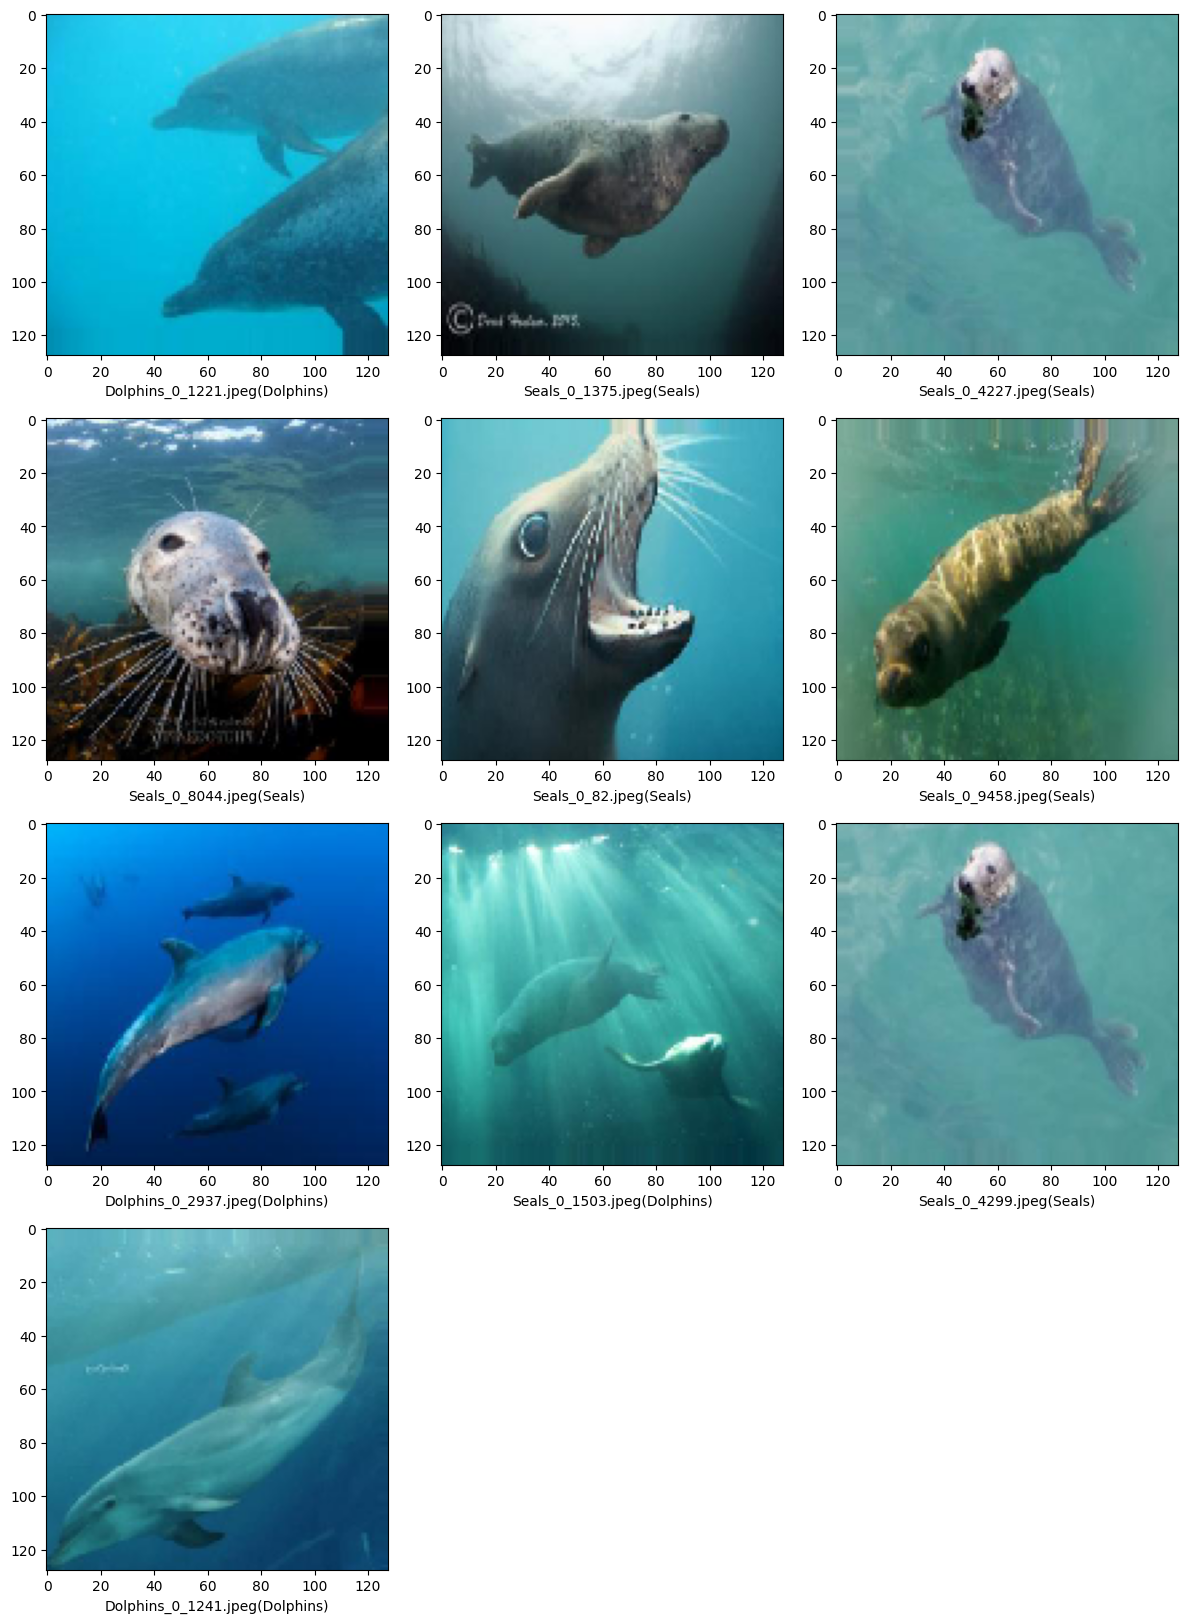

In [ ]:
sample_test = test_df.head(10)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/Data/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()